# SIMPLE LINEAR REGRESSION
In this, we build simple liner regression model to predict the sales using the propoer predictor variale

## STEP 1: READING AND UNDERSTANDING THE DATA
##### STEP 1: IMPORTING THE DATA
##### STEP 2: UNDERSTANDING THE STRUCTURE OF DATA
##### STEP 3: CLEANING OF DATA

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress the warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading the CSV file
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Shape of dataset
ad.shape

(200, 4)

In [5]:
# Statistical info of the dataset
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# As it can be seen from the info that there are no non null values in the dataset 
# therefore we can start the analysis.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## STEP 2: VISUALIZING THE DATA
##### STEP 1: USING PAIRPLOTS AND HISTOGRAMS

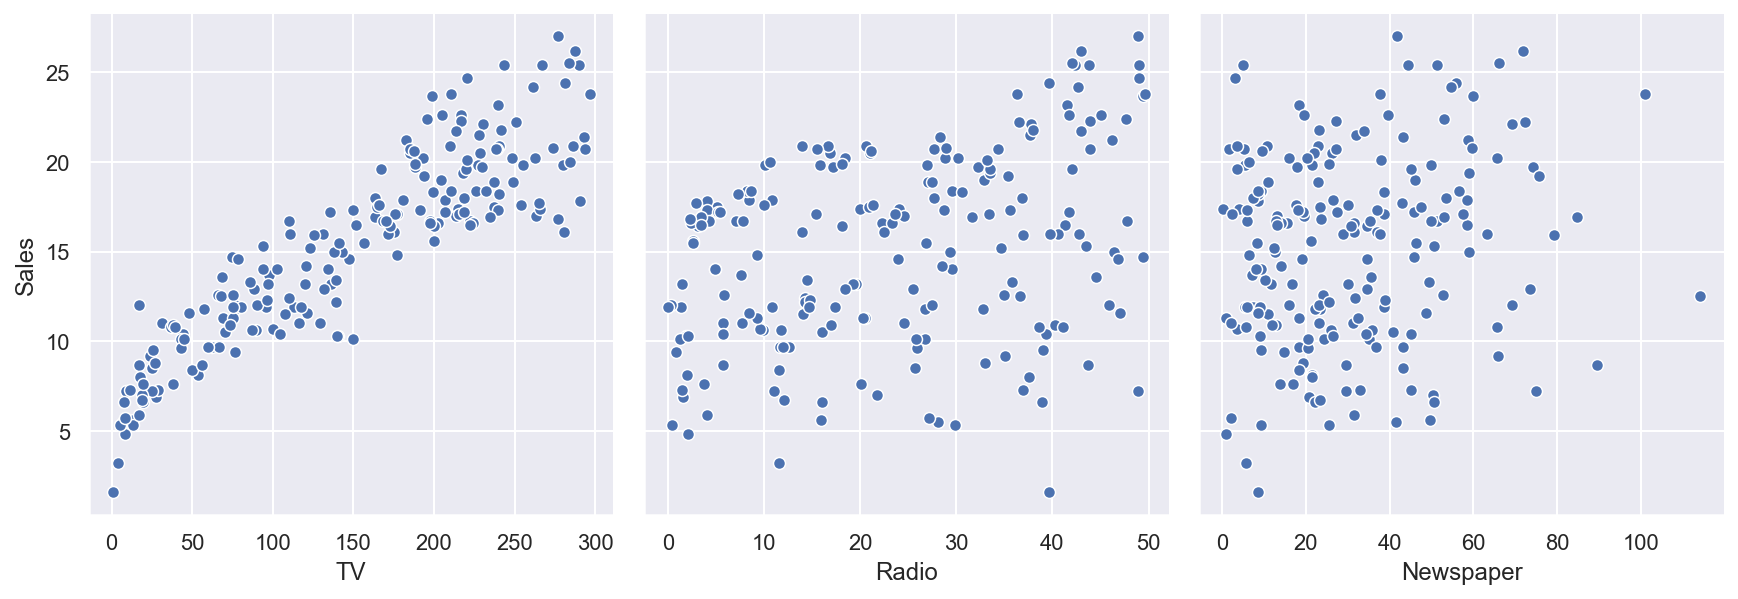

In [7]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.pairplot(ad, x_vars=["TV","Radio","Newspaper"], y_vars="Sales",size=4,aspect=1)
plt.show()

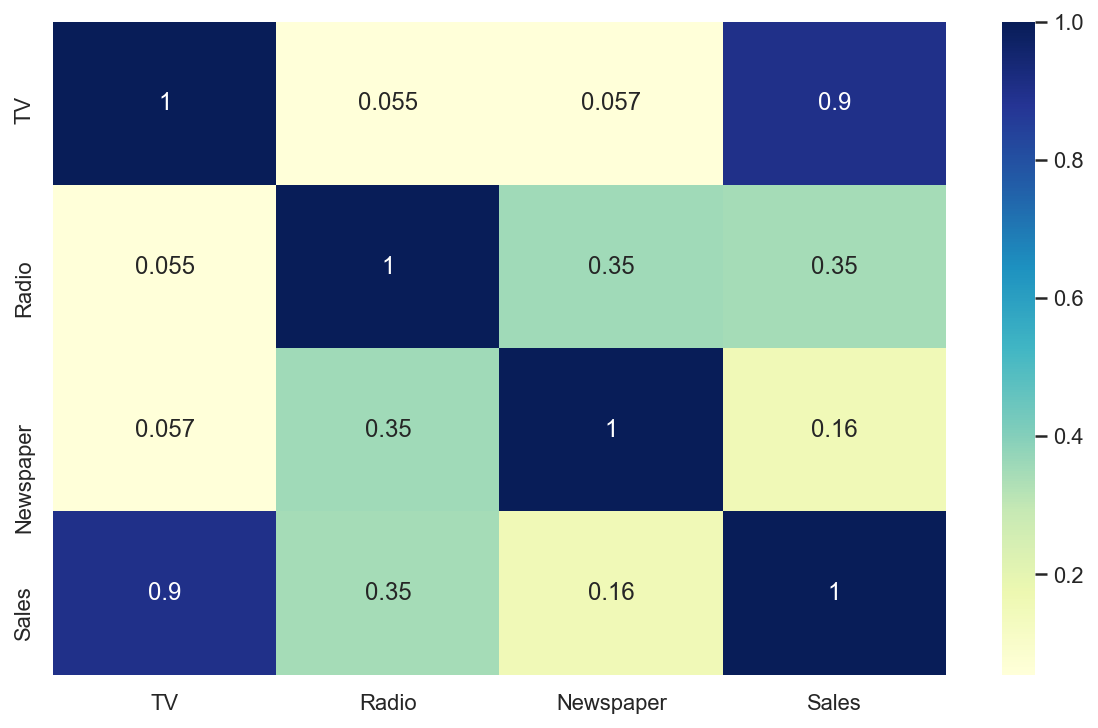

In [8]:
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(ad.corr(),annot=True, cmap="YlGnBu",)
plt.show()

###### As can be seen from the above plots that there is a high correlation between sales and TV, therefore performing Simple Linear Regression using TV as a feature variable makes more senese.

## STEP 3: PERFORMING SIMPLE LINEAR REGRESSION 

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### GENERIC STEPS IN MODEL BUILDING

1. ASSIGN THE FEATURE VARIABLE
2. TEST-TRAIN SPLIT
3. BUILDING A LINEAR MODEL

In [9]:
X = ad['TV']
y = ad['Sales']

### TEST-TRAIN SPLIT
USUALLY THE TEST TRAINING SETS ARE SPLIN IN THE RATIO OF 70%-30% OR 80%-20%

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    test_size=0.3, random_state=100)

In [11]:
# Now lets look at the training dataset
print(X_train.head())
print(y_train.head())

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64
74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64


### BUILDING A LINEAR MODEL
IMPORTING THE `STATSMODEL.API`

In [12]:
import statsmodels.api as sm

In [13]:
# ADD A CONSTANT TO GET AN INTERCEPT
X_train_sm = sm.add_constant(X_train)

# FIT THE REGRESSION LINE USING 'OLS' ORDINARY LEAST SQUARES
lr = sm.OLS(y_train, X_train_sm).fit()

In [14]:
# CHECKING THE PARAMETERS (INTERCEPT AND SLOPE)
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           1.52e-52
Time:                        19:31:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### KEY STATISTICS FROM SUMMARY
THE VALUES WE ARE CONCERNED WITH ARE:
#### 1. THE COEFFICIENT FOR TV IS `0.054`, WITH A LOW P-VALUE

THE COEFFICIENT IS STATISTICALLY SIGNIFICANT. SO THE ASSOCIATION IS NOT PURELY BY CHANCE

#### 2. R-SQUARED IS `0.816`
MEANING THAT 81.6% OF THE VARIANCE IS EXPLAINED BY TV. THIS IS DECENT R-SQUARED VALUE.

#### 3. F-STATIC HAS A LOW P-VALUE
MEANING THAT THE MODEL FIT IS STATISTICALLY SIGNIFICANT, AND THE EXPLAINED VARIANCE IS NOT PURELY BY CHANCE

THIS FIT IS SIGNIFICANT

FROM THE PARAMETERS, LINER REGRESSION EQUATION BECOMES

#### $ Sales = 6.948 + 0.054 \times TV $

### PLOTTING A STRAIGHT LINE

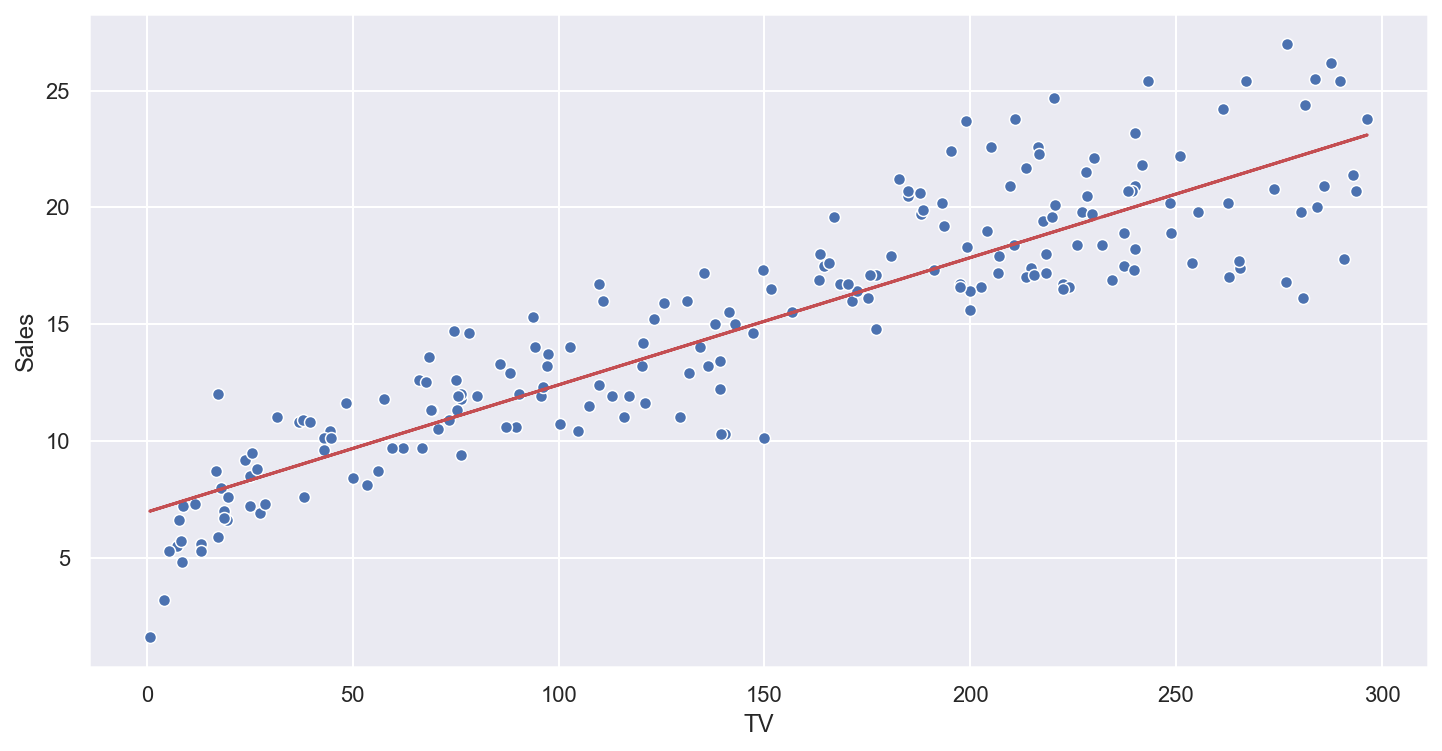

In [16]:
fig, ax=plt.subplots(figsize=(12,6))
sns.scatterplot(X,y)
plt.plot(X, 6.948 + 0.0545*X, 'r')
plt.show()

## STEP 4: RESIDUAL ANALYSIS

VALIDATING ASSUMPTIONS OF THE MODEL

####  1. DISRBUTION OF THE ERROR TERMS

####  2. LOOKING FOR PATTERNS IN RESIDUALS

#### DISTRIBUTIONS OF THE ERROR TERMS
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [17]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

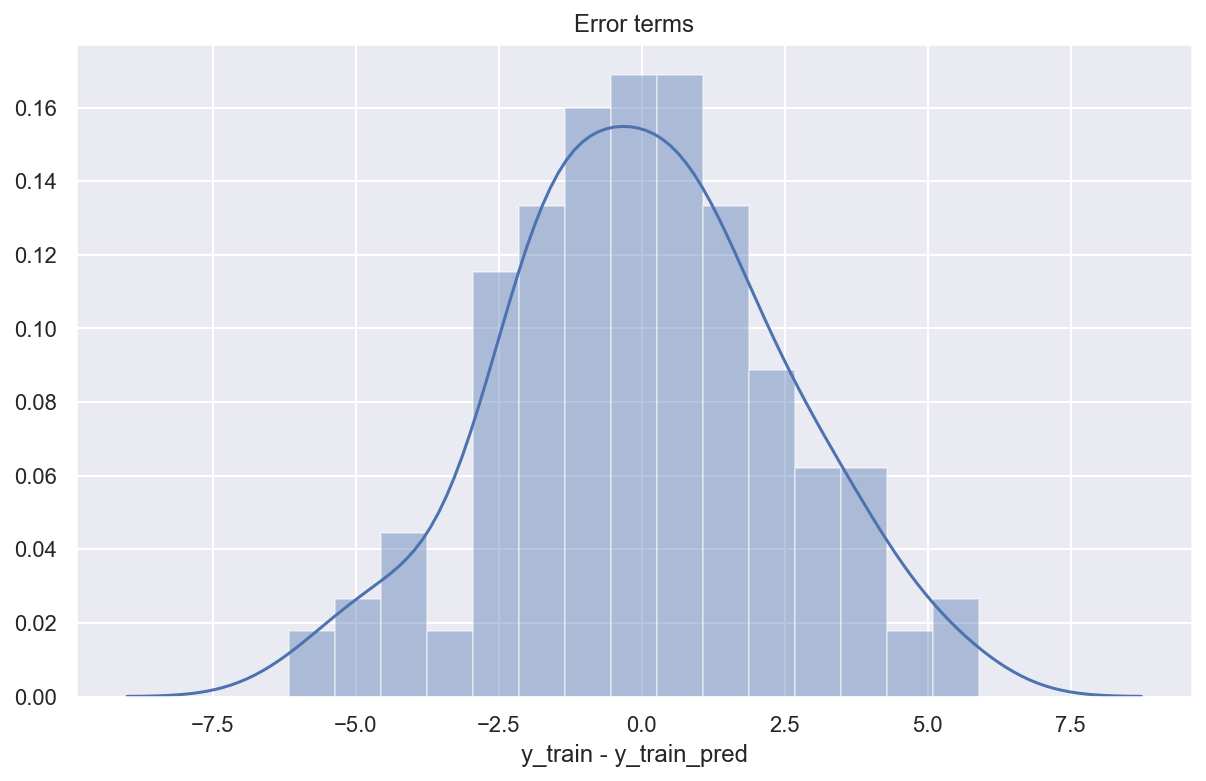

In [18]:
fig, ax=plt.subplots(figsize=(10,6))
sns.distplot(res,bins=15)
plt.title('Error terms')
plt.xlabel('y_train - y_train_pred')
plt.show()

###### THE RESEDUALS ARE NORMALLY DISTRIBUTED WITH A MEAN 0. ALL GOOD!


#### LOOKING FOR THE PATTERNS IN THE RESIDUALS

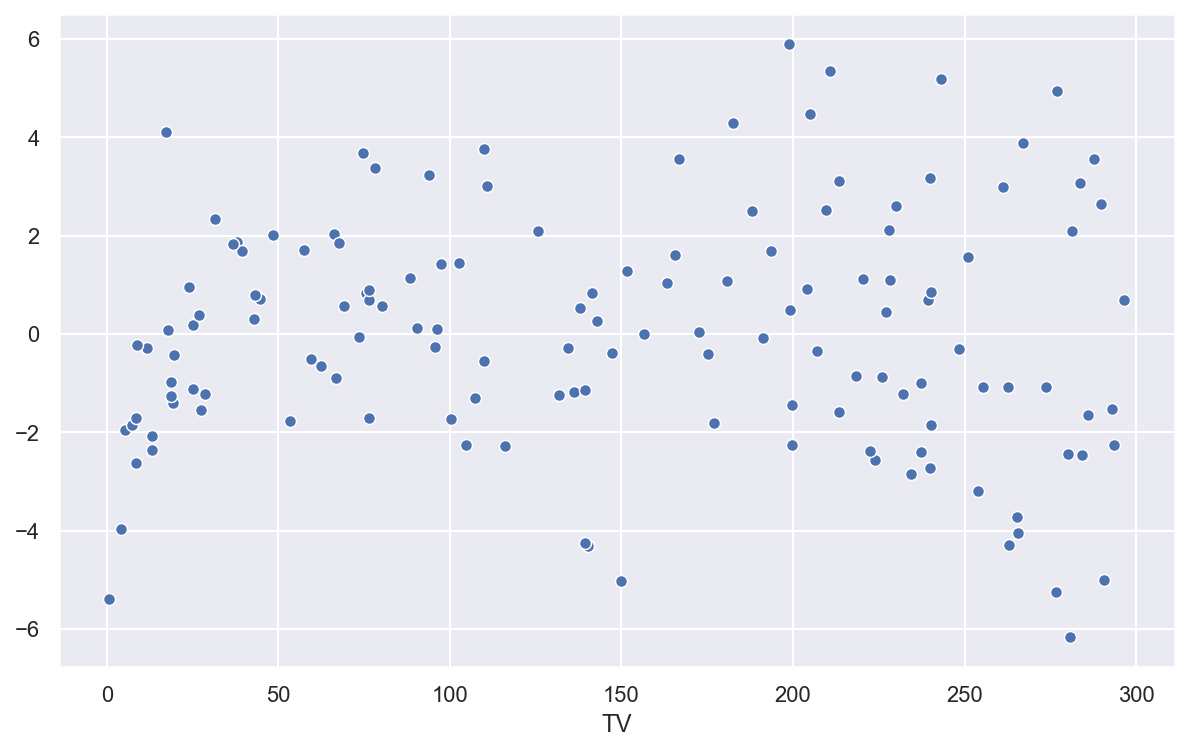

In [19]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(X_train,res)
plt.show()

###### WE ARE CONFIDENT THAT THE MODEL FIT ISNT BY CHANCE, AND HAS DECENT PREDICTIVE POWER. THE NORMALITY OF RESIDUAL TERMS ALLOWS SOME INFERENCE ON COEFFICIENTS.

###### ALTHOUGH THE VARIANCE OF RESIDUALS INCREASING WITH X INDICATES THAT THERE IS SIGNIFICANT VARIATION THAT THIS MODEL IS UNABLE TO EXPLAIN



## 5. PREDICTIONS ON TEST SET
##### 1.LOOKING FOR RMSE
##### 2.CHECKING FOR R-SQUARED TEST
##### 3.VISUALIZING THE FIT ON THE TEST SET

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# ADD A CONSTANT ON X_TEST
X_test_sm = sm.add_constant(X_test)

# PREDICT THE Y VALUES CORRESPONDING TO X_TEST_SM
y_pred = lr.predict(X_test_sm)

In [22]:
# CHECKING THE MEAN SWAURED ERROR
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966233

In [23]:
# CHECKING R-SQUARED
r_squared = r2_score(y_test,y_pred)
r_squared

0.7921031601245658

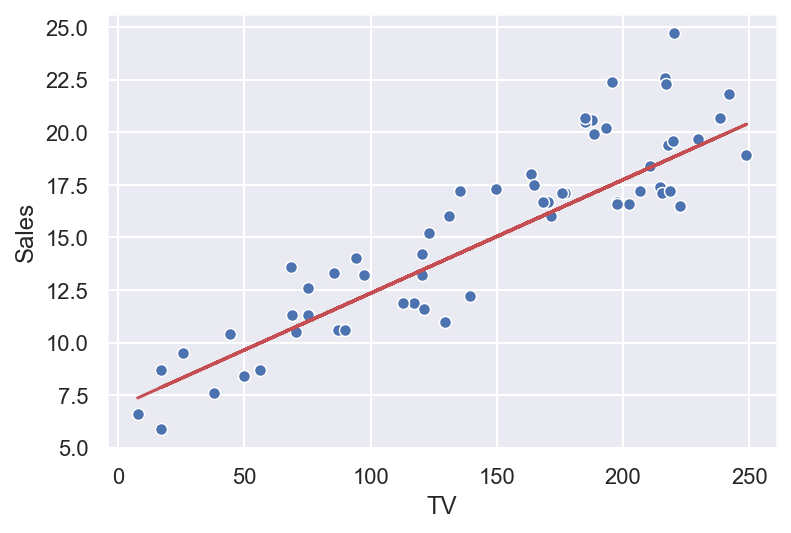

In [24]:
# VISUALIZING THE DATASET
sns.scatterplot(X_test,y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# LINEAR REGRESSION USING `LINEAR_MODEL` IN `SKLEARN`

In [25]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X,y,
                        train_size=0.70, test_size=0.30, random_state=100)

In [26]:
X_train_lm.shape

(140,)

In [27]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [28]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [29]:
from sklearn.linear_model import LinearRegression

# CREATING LINEAR REGRESSION OBJECT
lm = LinearRegression()

# FITTING THE MODEL 
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [30]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [31]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [32]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
